In [1300]:
import numpy as np
from dataclasses import dataclass
import matplotlib.pyplot as plt

In [ ]:
INTERVAL_ = (0, 2)
k_ = 20
h_ = 0.1
N_ = 9
n_ = 52

def function_(tau): 
    return 2 * (54 - n_) * np.sin(np.pi * tau) * np.sqrt(1 + 2 * N_ * (tau - 0.5)**2 + N_**2)

In [1302]:
@dataclass
class Point:
    x: int
    y: int

    def __str__(self) -> str:
        return f'(x: {self.x}, y: {self.y})'
    
    def __round__(self, ndigits=0):
        rounded_x = round(self.x, ndigits)
        rounded_y = round(self.y, ndigits)
        return Point(rounded_x, rounded_y)

In [1303]:
def decorate_plot(ax, x_ticks, xname, yname, loc=(-0.025, -0.3)):
    # Define font sizes
    SIZE_TICKS = 10

    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # axis names
    ax.set_ylabel(xname, loc='top', rotation=0, fontsize=15)
    ax.yaxis.set_label_coords(0.45, 0.95)

    ax.set_xlabel(yname, loc='right', fontsize=15, labelpad=-5)

    # k_ticks = k - (k % 10)
    # h_ticks = (b - a) / k_ticks
    # x_ticks = [a + i * h_ticks for i in range(k_ticks + 1)]
    ax.set_xticks(x_ticks)

    # Adjust the font size of the tick labels
    ax.tick_params(axis='both', which='major', labelsize=SIZE_TICKS)

    plt.gca().spines['bottom'].set_position(('data',0))

    # plt.legend(fontsize=10, loc='lower left')
    plt.legend(fontsize=10, loc=loc)

    # Update font settings
    plt.rcParams.update({'font.family': 'serif', 'font.size': 12})

    # Adjust layout
    plt.tight_layout()

In [1304]:
def Uniform_NET(k, func, a, b):
    h = (b - a) / (k)

    print(h)

    data = []
    for i in range(k + 1):
        x = a + i * h
        y = func(x)

        data.append(Point(x, y))
    return data

a_ = INTERVAL_[0]
b_ = INTERVAL_[1]
data_ = Uniform_NET(k_, function_, a_, b_)
for ind, point in enumerate(data_):
    print(f'{ind}: {round(point, 3)}')

0.02
0: (x: 0.0, y: 0.0)
1: (x: 0.02, y: 2.331)
2: (x: 0.04, y: 4.644)
3: (x: 0.06, y: 6.93)
4: (x: 0.08, y: 9.181)
5: (x: 0.1, y: 11.388)
6: (x: 0.12, y: 13.544)
7: (x: 0.14, y: 15.64)
8: (x: 0.16, y: 17.67)
9: (x: 0.18, y: 19.625)
10: (x: 0.2, y: 21.5)
11: (x: 0.22, y: 23.286)
12: (x: 0.24, y: 24.979)
13: (x: 0.26, y: 26.571)
14: (x: 0.28, y: 28.057)
15: (x: 0.3, y: 29.432)
16: (x: 0.32, y: 30.691)
17: (x: 0.34, y: 31.83)
18: (x: 0.36, y: 32.845)
19: (x: 0.38, y: 33.731)
20: (x: 0.4, y: 34.487)
21: (x: 0.42, y: 35.108)
22: (x: 0.44, y: 35.594)
23: (x: 0.46, y: 35.942)
24: (x: 0.48, y: 36.152)
25: (x: 0.5, y: 36.222)
26: (x: 0.52, y: 36.152)
27: (x: 0.54, y: 35.942)
28: (x: 0.56, y: 35.594)
29: (x: 0.58, y: 35.108)
30: (x: 0.6, y: 34.487)
31: (x: 0.62, y: 33.731)
32: (x: 0.64, y: 32.845)
33: (x: 0.66, y: 31.83)
34: (x: 0.68, y: 30.691)
35: (x: 0.7, y: 29.432)
36: (x: 0.72, y: 28.057)
37: (x: 0.74, y: 26.571)
38: (x: 0.76, y: 24.979)
39: (x: 0.78, y: 23.286)
40: (x: 0.8, y: 21.5)
41: (

In [1305]:
def buildBar(filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # plot
    x_values = [point.x for point in data_]
    y_values = [point.y for point in data_]

    ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k_} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5)

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2+0.1, 0.1), '$f (\\tau)$', '$\\tau$', loc=(0, 0))

    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

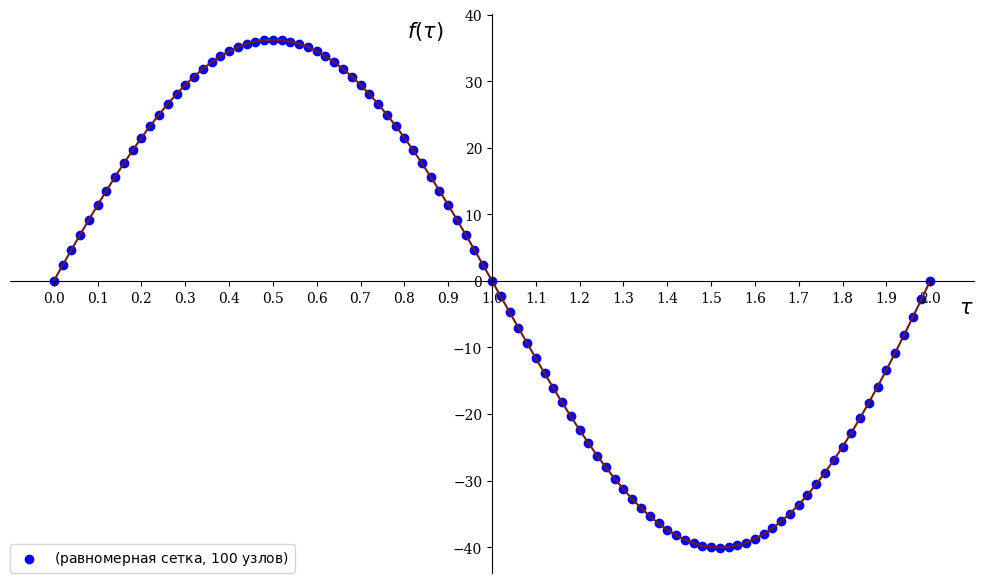

In [1306]:
buildBar('')

In [1307]:
X = [point.x for point in data_]
print(len(X))
print(f'X: {X}')


Y = [point.y for point in data_]
print(len(Y))
print(f'Y: {Y}')


H = [None for _ in range(k_+1)]
for i in range(1, k_+1):
    H[i] = X[i] - X[i-1]
print(len(H))
print(f'H: {H}')


A = [None for _ in range(k_+1)]
for i in range(1, k_+1):
    A[i] = Y[i-1]
print(len(A))
print(f'A: {A}')


G = [None for _ in range(k_+1)]
for i in range(1, k_):
    G[i] = (A[i+1]-A[i])/H[i]
print(len(G))
print(f'G: {G}')

101
X: [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.6400000000000001, 1.6600000000000001, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.8800000000000001, 1.9000000000000001, 1.92, 1.94, 1.96, 1.98, 2.0]
101
Y: [0.0, 2.3311737866086526, 4.643999348273442, 6.929959918579619, 9.180676779378702, 11.387936605884127, 13.543718040494056, 15.640217430028706, 17.669873664908867, 19.62539206262159, 21.499767241599038, 23.286304935360988, 24.978642700424384, 26.570769475053

In [1308]:
MATRIX = np.zeros((k_-2, k_-2))
for i in range(1, k_-2 + 1):
    if i == 1:
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
        MATRIX[i-1, i+1-1] = H[i+1]
    elif i == k_-2:
        MATRIX[i-1, i-1-1] = H[i]
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
    else:
        MATRIX[i-1, i-1-1] = H[i]
        MATRIX[i-1, i-1] = 2 * (H[i] + H[i+1])
        MATRIX[i-1, i+1-1] = H[i+1]

print(MATRIX)


g_vector = np.zeros(k_-2)
for i in range(1, k_-2 + 1):
    g_vector[i-1] = 3 * (G[i+1] - G[i])

print(g_vector)


C = np.linalg.solve(MATRIX, g_vector)
C = [None] + [0] + list(C) + [0]
print(len(C))
print(f'C: {C}')

[[0.08 0.02 0.   ... 0.   0.   0.  ]
 [0.02 0.08 0.02 ... 0.   0.   0.  ]
 [0.   0.02 0.08 ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.08 0.02 0.  ]
 [0.   0.   0.   ... 0.02 0.08 0.02]
 [0.   0.   0.   ... 0.   0.02 0.08]]
[ -2.75223374  -4.0297487   -5.28655643  -6.51855514  -7.72175878
  -8.89230676 -10.0264732  -11.12067558 -12.17148281 -13.17562278
 -14.1299893  -15.03164857 -15.87784504 -16.66600692 -17.393751
 -18.05888718 -18.65942239 -19.1935642  -19.65972393 -20.05651935
 -20.38277705 -20.63753433 -20.82004083 -20.92975971 -20.96636851
 -20.92975971 -20.82004083 -20.63753433 -20.38277705 -20.05651935
 -19.65972393 -19.1935642  -18.65942239 -18.05888718 -17.393751
 -16.66600692 -15.87784504 -15.03164857 -14.1299893  -13.17562278
 -12.17148281 -11.12067558 -10.0264732   -8.89230676  -7.72175878
  -6.51855514  -5.28655643  -4.0297487   -2.75223374  -1.45821862
  -0.1520048    1.1620234    2.47941086   3.79564427   5.10616523
   6.40638389   7.69169305   8.95748263  10.199154

In [1309]:
B = [None for _ in range(k_+1)]
for i in range(1, k_):
    B[i] = G[i] - H[i]/3 * (2*C[i] + C[i+1])
B[k_] = B[k_ - 1] + H[k_ - 1] * (C[k_ - 1] + C[k_])
print(len(B))
print(f'B: {B}')


D = [None for _ in range(k_+1)]
for i in range(1, k_):
    D[i] = 1/(3*H[i]) * (C[i+1] - C[i])
D[k_] = 1/H[k_]**3 * (Y[k_] - A[k_] - B[k_] * H[k_] - C[k_]*H[k_]**2)
print(len(D))
print(f'D: {D}')

101
B: [None, 116.73348156840696, 116.20910485448395, 115.0300012546735, 113.48880992246704, 111.51637372124738, 109.14219828821955, 106.37102229317767, 103.21583616075647, 99.68897672601787, 95.80445182410487, 91.57725248108824, 87.02346916245186, 82.16018969290647, 77.0054530197391, 71.57818557396816, 65.89814006735067, 59.98583161467709, 53.8624727486625, 47.54990709833068, 41.07054197616047, 34.44727998540847, 27.70344978857098, 20.862736164136436, 13.949109477240174, 6.986754685673313, -8.881784197001252e-15, -6.986754685673278, -13.949109477240203, -20.86273616413628, -27.703449788570932, -34.44727998540892, -41.07054197615847, -47.54990709833826, -53.8624727486359, -59.98583161477604, -65.8981400669804, -71.5781855753503, -77.00545301458183, -82.16018971215233, -87.02346909062378, -91.57725274915398, -95.80445082367063, -99.6889804596898, -103.21582222650304, -106.3710742965196, -109.14200420910515, -111.51709803436339, -113.48610674911754, -115.0400896349553, -116.1714545067062

In [1310]:
print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'A (size: {len(A)}): {A}')
print(f'B (size: {len(B)}): {B}')
print(f'C (size: {len(C)}): {C}')
print(f'D (size: {len(D)}): {D}')

X (size: 101): [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7000000000000001, 0.72, 0.74, 0.76, 0.78, 0.8, 0.8200000000000001, 0.84, 0.86, 0.88, 0.9, 0.92, 0.9400000000000001, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.1400000000000001, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.3800000000000001, 1.4000000000000001, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.6400000000000001, 1.6600000000000001, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.8800000000000001, 1.9000000000000001, 1.92, 1.94, 1.96, 1.98, 2.0]
Y (size: 101): [0.0, 2.3311737866086526, 4.643999348273442, 6.929959918579619, 9.180676779378702, 11.387936605884127, 13.543718040494056, 15.640217430028706, 17.669873664908867, 19.62539206262159, 21.499767241599038, 23.286304935360988, 24.978642700424384,

In [1311]:
A = A[1:]
B = B[1:]
C = C[1:]
D = D[1:]
X = list(np.round(np.array(X),3))
# X = X[:-1]
# Y = Y[:-1]

# A = A[1:] + [A[-1]]
# B = B[1:] + [B[-1]]
# C = C[1:] + [C[-1]]
# D = D[1:] + [D[-1]]
# X = X
# Y = Y

print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'A (size: {len(A)}): {A}')
print(f'B (size: {len(B)}): {B}')
print(f'C (size: {len(C)}): {C}')
print(f'D (size: {len(D)}): {D}')

n = k_

def S(x):
    i = np.searchsorted(X, x) - 1

    if i < 0:
        i = 0
    elif i >= n:
        i = n - 1

    # print(i, x, X[i])

    dx = x - X[i]
    return A[i] + B[i] * dx + C[i] * dx**2 + D[i] * dx**3

S_vals = [S(x) for x in X]
print(len(S_vals))
print(f'S_vals: {S_vals}')


X (size: 101): [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0]
Y (size: 101): [0.0, 2.3311737866086526, 4.643999348273442, 6.929959918579619, 9.180676779378702, 11.387936605884127, 13.543718040494056, 15.640217430028706, 17.669873664908867, 19.62539206262159, 21.499767241599038, 23.286304935360988, 24.978642700424384, 26.5707694750531, 28.057043949396594, 29.432211710939516, 30.691421132450245, 31.830237972770995, 32.84465866383463, 33.7311222602253, 34.4865

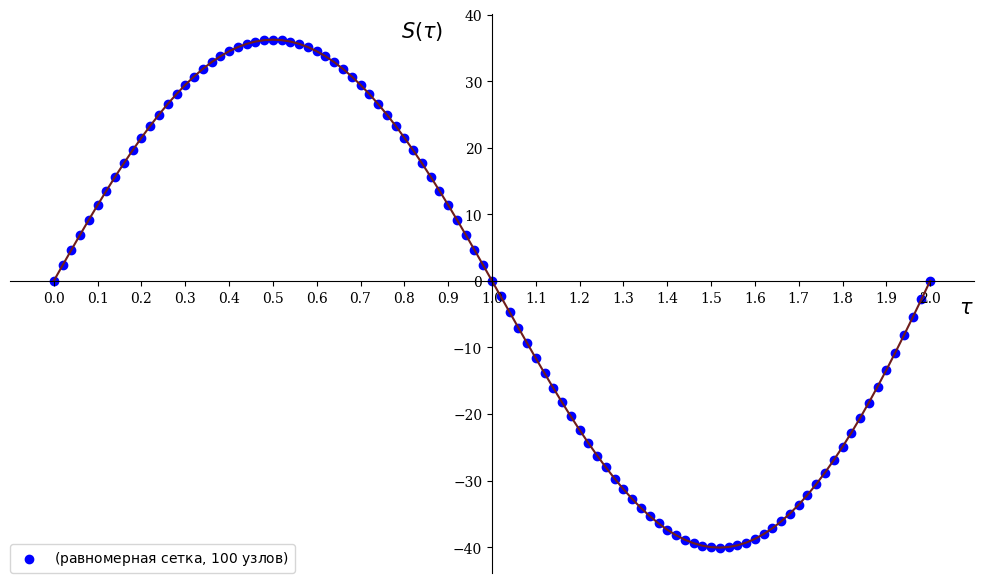

In [1312]:
def buildBar(k, filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # plot
    x_values = X
    y_values = S_vals

    ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5)

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2+0.1, 0.1), '$S (\\tau)$', '$\\tau$', loc=(0, 0))
    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar(k_,'')

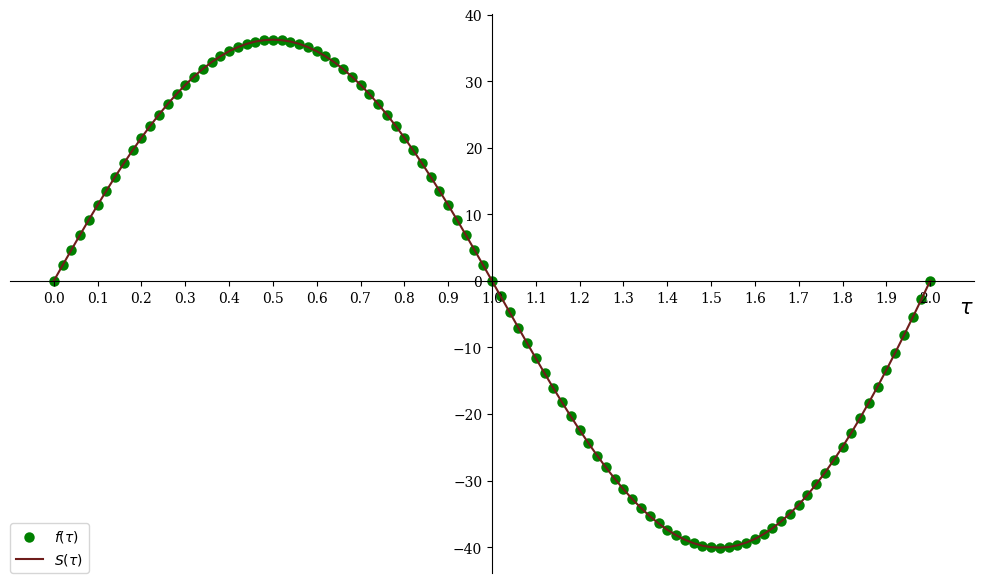

In [1313]:
def buildBar(k, filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # main plot
    x_values = X
    y_values = Y

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.scatter(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau)$')

    # spline plot
    x_values = X
    y_values = S_vals

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label='$S(\\tau)$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2 + 0.1, 0.1), '', '$\\tau$', loc=(0, 0))
    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar(k_,'')

In [1314]:
print(f'X (size: {len(X)}): {X}')
print(f'Y (size: {len(Y)}): {Y}')
print(f'S_vals: {S_vals}')

X (size: 101): [0.0, 0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.22, 0.24, 0.26, 0.28, 0.3, 0.32, 0.34, 0.36, 0.38, 0.4, 0.42, 0.44, 0.46, 0.48, 0.5, 0.52, 0.54, 0.56, 0.58, 0.6, 0.62, 0.64, 0.66, 0.68, 0.7, 0.72, 0.74, 0.76, 0.78, 0.8, 0.82, 0.84, 0.86, 0.88, 0.9, 0.92, 0.94, 0.96, 0.98, 1.0, 1.02, 1.04, 1.06, 1.08, 1.1, 1.12, 1.14, 1.16, 1.18, 1.2, 1.22, 1.24, 1.26, 1.28, 1.3, 1.32, 1.34, 1.36, 1.38, 1.4, 1.42, 1.44, 1.46, 1.48, 1.5, 1.52, 1.54, 1.56, 1.58, 1.6, 1.62, 1.64, 1.66, 1.68, 1.7, 1.72, 1.74, 1.76, 1.78, 1.8, 1.82, 1.84, 1.86, 1.88, 1.9, 1.92, 1.94, 1.96, 1.98, 2.0]
Y (size: 101): [0.0, 2.3311737866086526, 4.643999348273442, 6.929959918579619, 9.180676779378702, 11.387936605884127, 13.543718040494056, 15.640217430028706, 17.669873664908867, 19.62539206262159, 21.499767241599038, 23.286304935360988, 24.978642700424384, 26.5707694750531, 28.057043949396594, 29.432211710939516, 30.691421132450245, 31.830237972770995, 32.84465866383463, 33.7311222602253, 34.4865

In [1315]:
class CDM:
    def __init__(self, h):
        self.h = h
    
    def diff(self, f, x):
        numerator = f(x + self.h) - f(x - self.h)
        denominator = 2 * self.h

        return numerator / denominator

In [1316]:
cdm = CDM(h=1e-6)

Y_diff = [cdm.diff(function_, x) for x in X]
S_diff = [cdm.diff(S, x) for x in X]

print(f'Y_diff (size: {len(Y_diff)}): {Y_diff}')
print(f'S_diff (size: {len(S_diff)}): {S_diff}')

Y_diff (size: 101): [116.87400263131843, 116.17146239428777, 115.04009733753762, 113.48611424555344, 111.51710530921122, 109.14201124112566, 106.37108106958948, 103.21582872752089, 99.68898667267467, 95.80445673584848, 91.57725834718633, 87.0234743644005, 82.160194649461, 77.00545760336297, 71.57818981085029, 65.89814393898052, 59.98583511868105, 53.86247588035076, 47.549909851341, 41.0705443414372, 34.44728196200231, 27.70345137648178, 20.862737354576666, 13.949110272193366, 6.986755085591767, 0.0, -6.986755085591767, -13.949110272193366, -20.862737354576666, -27.70345137648178, -34.44728196555502, -41.07054434498991, -47.54990985489371, -53.86247588567983, -59.98583512933919, -65.89814394786231, -71.57818981973207, -77.0054576104684, -82.16019465301372, -87.02347437150593, -91.5772583525154, -95.80445674117755, -99.68898667800374, -103.21582873284996, -106.37108106958948, -109.1420112393493, -111.51710530832304, -113.48611424555344, -115.04009733664944, -116.17146239384368, -116.8740

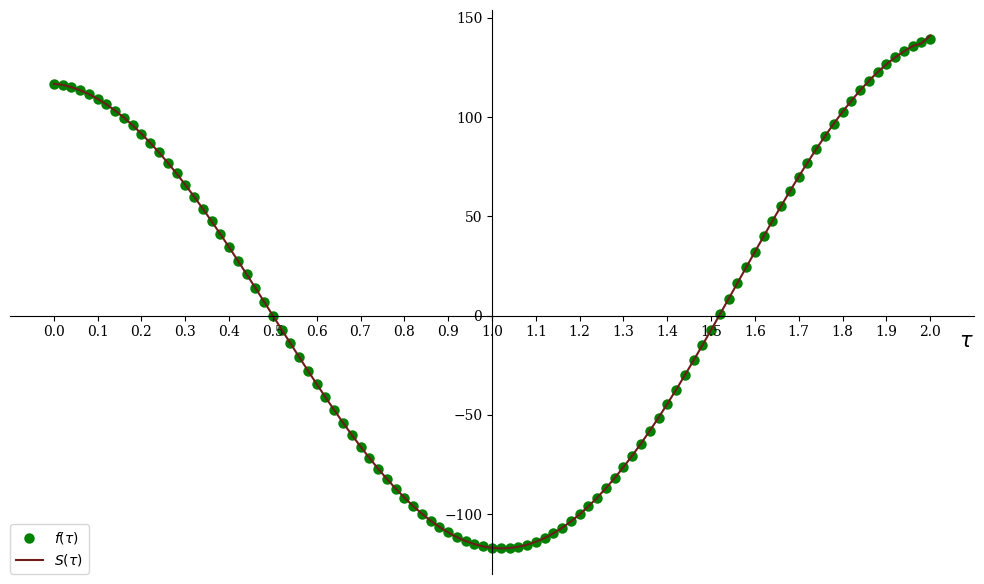

In [1317]:
def buildBar(k, filename):
    # Define colors
    RED = '#6F1D1B'

    # Create the figure and axis
    _, ax = plt.subplots(figsize=(10, 6))

    # main plot
    x_values = X
    y_values = Y_diff

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.scatter(x_values, y_values, color='green', linestyle='-', linewidth=1.5, label='$f(\\tau)$')

    # spline plot
    x_values = X
    y_values = S_diff

    # ax.scatter(x_values, y_values, color='blue', label=f'$\\text{{(равномерная сетка, {k} узлов)}}$')
    ax.plot(x_values, y_values, color=RED, linestyle='-', linewidth=1.5, label='$S(\\tau)$')

    # Call the decoration function
    decorate_plot(ax, np.arange(0, 2 + 0.1, 0.1), '', '$\\tau$', loc=(0, 0))
    # Save the figure
    # plt.savefig(f'{filename}.png', dpi=300, transparent=True)

    # Show the plot
    plt.show()

buildBar(k_,'')